In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
# 한글 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic, Linux: NanumGothic 등)
# 사용 환경에 맞는 폰트 이름을 지정해주세요.
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # macOS
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (나눔고딕 설치 필요)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

raw_welfare = pd.read_spss('./data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
welfare.shape

welfare = welfare.rename(columns = {'h14_g3'     : 'sex',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

In [6]:
welfare['religion'].dtypes  # 변수 타입 출력

dtype('float64')

In [7]:
welfare['religion'].value_counts()  # 빈도 구하기

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [8]:
welfare['religion'] = np.where(welfare['religion']==1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

In [9]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [12]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [23]:
n_divorce = welfare['marriage'].value_counts()
n_divorce = pd.DataFrame(n_divorce).reset_index() # 인덱스 일반컬럼으로 변경
n_divorce

,marriage,count
0,marriage,7190
1,etc,6539
2,divorce,689


<Axes: xlabel='marriage'>

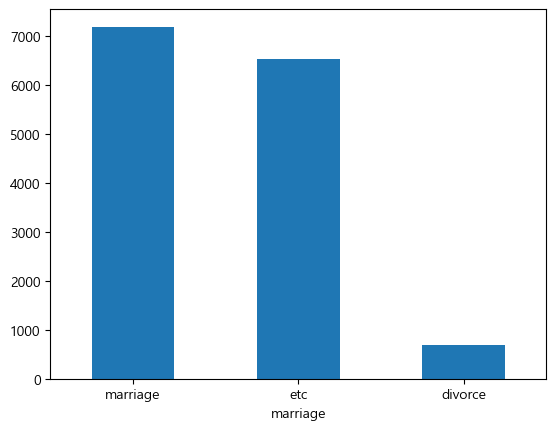

In [22]:
welfare['marriage'].value_counts().plot.bar(rot=0)

<Axes: xlabel='marriage', ylabel='count'>

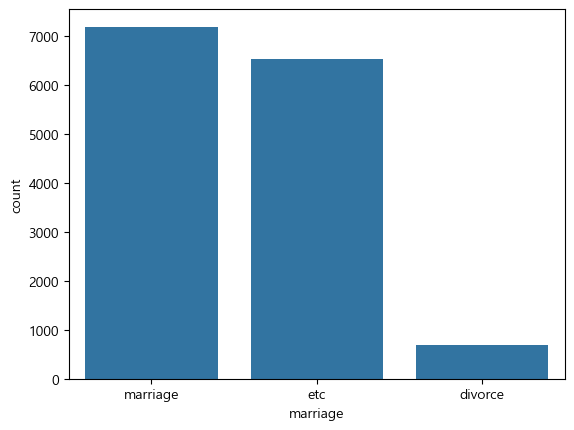

In [25]:
sns.barplot(data=n_divorce, x = 'marriage', y = 'count')

In [26]:
welfare['marriage'].value_counts()

marriage
marriage    7190
etc         6539
divorce      689
Name: count, dtype: int64

In [34]:
rel_div = welfare.query('marriage != "etc"').groupby('religion',as_index=False)['marriage']\
.value_counts(normalize=True)
# .value_counts() # 건수
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [35]:
rel_div = \
    rel_div.query('marriage == "divorce"') \
           .assign(proportion = rel_div['proportion'] * 100) \
           .round(1)

rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion'>

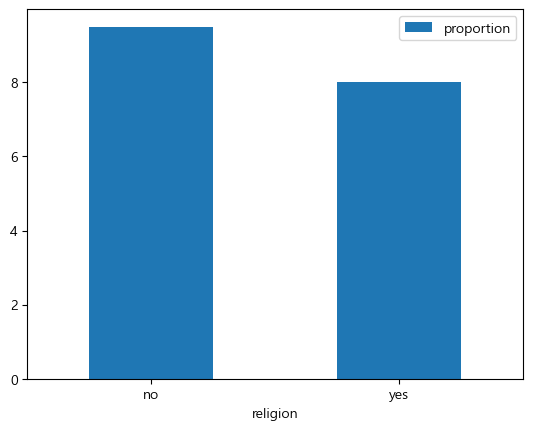

In [39]:
rel_div.plot.bar(
    x = 'religion',
    y = 'proportion',
    rot = 0
)

<Axes: xlabel='religion', ylabel='proportion'>

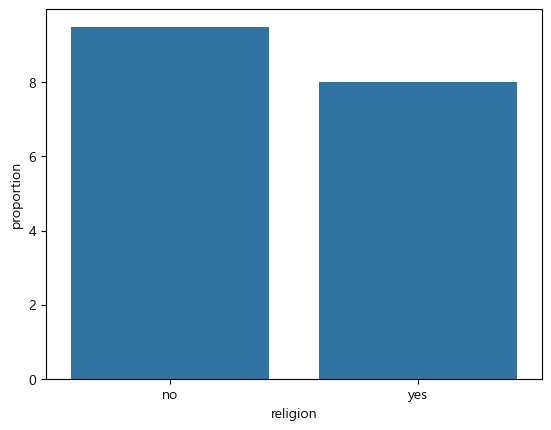

In [41]:
sns.barplot(
    data=rel_div,
    x = 'religion',
    y = 'proportion'
)

In [42]:
welfare['code_region'].dtypes  # 변수 타입 출력

dtype('float64')

In [43]:
welfare['code_region'].value_counts()  # 빈도 구하기

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [44]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [45]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [46]:
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

KeyError: 'Column not found: ageg'

In [ ]:
region_ageg = \
    region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
               .round(1)

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')